In [1]:
from tqdm.auto import tqdm
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import pandas as pd
import string
import re
from sklearn.model_selection import train_test_split
from sklearn import model_selection, naive_bayes, svm
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

In [2]:
df1 = pd.read_csv("/Users/julianalexander/Library/Mobile Documents/com~apple~CloudDocs/HSG/1. Semester MBI FS2021/8,049,1.00 Text Mining mit Python/TextMining21/Reddit_Julian_TOTAL-klassifiziert.csv")
df2 = pd.read_csv("/Users/julianalexander/Library/Mobile Documents/com~apple~CloudDocs/HSG/1. Semester MBI FS2021/8,049,1.00 Text Mining mit Python/TextMining21/Reddit_Marek_klassifiziert.csv")
df3 = pd.read_csv("/Users/julianalexander/Library/Mobile Documents/com~apple~CloudDocs/HSG/1. Semester MBI FS2021/8,049,1.00 Text Mining mit Python/TextMining21/Reddit_Yonas_Total_Klassifiziert.csv")

In [3]:
Atweets = pd.concat([df1, df2, df3], axis=0, join='inner')
Atweets = Atweets.sort_values(by='index')
Atweets = Atweets.reset_index(drop=True)

Punktuierung

In [4]:
def remove_punctuation(txt):
    txt_nopunt = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopunt

In [5]:
Atweets["submission"] = Atweets["submission"].apply(lambda x: remove_punctuation(x))

Tokenisierung

In [6]:
def tokenize(txt):
    tokens = re.split("\W+", txt)
    return tokens

In [7]:
Atweets["submissions_tokenized"] = Atweets["submission"].apply(lambda x: tokenize(x.lower()))

Stopwörter

In [8]:
stopwords = nltk.corpus.stopwords.words("english")

In [9]:
stopwords.append("ll")
stopwords.append("im")
stopwords.append("youre")
stopwords.append("youve")
stopwords.append("youll")
stopwords.append("youd")
stopwords.append("shes")
stopwords.append("its")
stopwords.append("thatll")
stopwords.append("dont")
stopwords.append("shouldve")
stopwords.append("arent")
stopwords.append("couldnt")
stopwords.append("didnt")
stopwords.append("doesnt")
stopwords.append("hadnt")
stopwords.append("havent")
stopwords.append("isnt")
stopwords.append("mightnt")
stopwords.append("neednt")
stopwords.append("shant")
stopwords.append("shouldnt")
stopwords.append("wasnt")
stopwords.append("werent")
stopwords.append("wont")
stopwords.append("wouldnt")

In [10]:
def remove_stopwords(txt_tokenized):
    txt_clean = [word for word in txt_tokenized if word not in stopwords]
    return txt_clean

In [11]:
Atweets["submission_no_stopwords"] = Atweets["submissions_tokenized"].apply(lambda x: remove_stopwords(x))

Stemming

In [12]:
ps = PorterStemmer()

In [13]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

In [14]:
Atweets["submission_stemmed"] = Atweets["submission_no_stopwords"].apply(lambda x: stemming(x))

Lemmatisierung

In [15]:
wn = nltk.WordNetLemmatizer()

In [16]:
def lemmatization(token_txt):
    text = [wn.lemmatize(word) for word in token_txt]
    return text

In [17]:
Atweets["submission_lemmatized"] = Atweets["submission_no_stopwords"].apply(lambda x: lemmatization(x))

Train und Test-Set

In [18]:
Corpus = Atweets.loc[:, "submission"].values

In [19]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus,Atweets['sentiment'],test_size=0.2)

In [20]:
Tfidf_vect = TfidfVectorizer(max_features=12842)
Tfidf_vect.fit(Corpus)
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [21]:
Atweets = Atweets.reset_index()

Naive Bayes

In [22]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  75.87354409317804


Precision, recall, fscore

In [23]:
precision_recall_fscore_support(predictions_NB, Test_Y, average='weighted')

/Users/julianalexander/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(1.0, 0.7587354409317804, 0.8628192999053926, None)

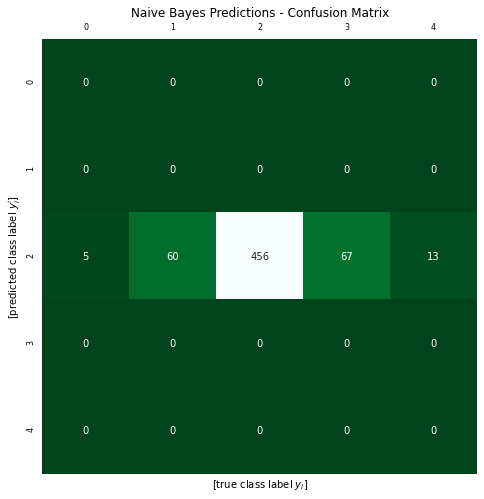

In [24]:
from sklearn.metrics import confusion_matrix

# import matplotlib data visualization library

import matplotlib.pyplot as plt

import seaborn as sns


# determine the prediction confusion matrix

mat = confusion_matrix(Test_Y, predictions_NB)


# init the plot

plt.figure(figsize=(8, 8))


# plot confusion matrix heatmap

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='BuGn_r')


# add plot axis labels

plt.xlabel('[true class label $y_{i}$]')

plt.ylabel('[predicted class label $y_{i}\'$]')

plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = False, left = False, labeltop=True)


# add plot title

plt.title('Naive Bayes Predictions - Confusion Matrix');

SVM

In [25]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  76.03993344425956


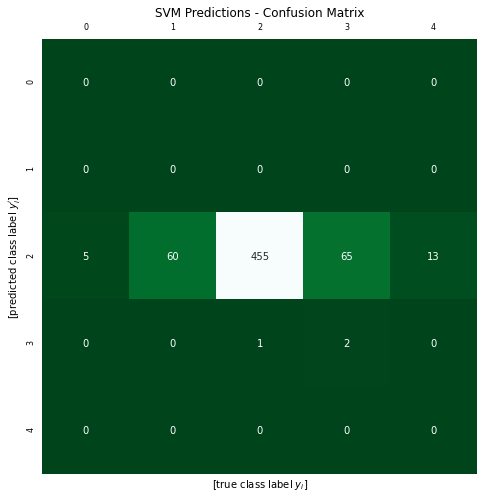

In [26]:
from sklearn.metrics import confusion_matrix

# import matplotlib data visualization library

import matplotlib.pyplot as plt

import seaborn as sns


# determine the prediction confusion matrix

mat = confusion_matrix(Test_Y, predictions_SVM)


# init the plot

plt.figure(figsize=(8, 8))


# plot confusion matrix heatmap

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='BuGn_r')


# add plot axis labels

plt.xlabel('[true class label $y_{i}$]')

plt.ylabel('[predicted class label $y_{i}\'$]')

plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = False, left = False, labeltop=True)


# add plot title

plt.title('SVM Predictions - Confusion Matrix');